In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install tensorflow pandas openpyxl

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


In [3]:
file_path = '/content/drive/My Drive/dataset_damin_5000.xlsx'
df = pd.read_excel(file_path)

# Jika hanya ingin menggunakan data numerik
data = df.select_dtypes(include=[np.number]).fillna(0)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [5]:
input_dim = data_scaled.shape[1]  # Jumlah fitur
encoding_dim = 32  # Dimensi laten (bisa diubah sesuai kebutuhan)

# Input Layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile Model
autoencoder.compile(optimizer='adam', loss='mse')

# Summary of the Model
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162 (648.00 B)

 Trainable params: 162 (648.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
encoded_results = []  # Untuk menyimpan hasil encoded dari setiap training
decoded_results = []  # Untuk menyimpan hasil decoded dari setiap training
autoencoder_histories = []  # Untuk menyimpan history training (loss/val_loss)

# Loop untuk training autoencoder beberapa kali dengan parameter yang berbeda
for i in range(3):  # Contoh: Lakukan 3 kali training dengan setting berbeda
    # Define the autoencoder model
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    # Train the autoencoder
    history = autoencoder.fit(data_scaled, data_scaled,
                              epochs=25 + i * 25,  # Variasikan jumlah epochs
                              batch_size=32,
                              shuffle=True,
                              validation_split=0.2)

    # Simpan history training
    autoencoder_histories.append(history)

    # Encode and decode the data
    encoder = Model(inputs=input_layer, outputs=encoded)
    encoded_data = encoder.predict(data_scaled)
    decoded_data = autoencoder.predict(data_scaled)

    # Simpan hasil encoded dan decoded dari setiap training
    encoded_results.append(encoded_data)
    decoded_results.append(decoded_data)



Epoch 1/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1355 - val_loss: 0.1134
Epoch 2/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0539 - val_loss: 0.0698
Epoch 3/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0243 - val_loss: 0.0377
Epoch 4/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0120 - val_loss: 0.0160
Epoch 5/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051 - val_loss: 0.0069
Epoch 6/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 7/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 8/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0121e-04 - val_loss: 0.0018
Epoch 9/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3629e-04 - val_loss: 0.0017
Epoch 10/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.6988e-04 - val_loss: 0.0016
Epoch 11/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8972e-04 - val_loss: 0.0016
Epoch 12/25
126/126 ━━━━━━━━━━━━━━━━

In [7]:
# Extract the encoder part of the model
encoder = Model(inputs=input_layer, outputs=encoded)

# Encode the data
encoded_data = encoder.predict(data_scaled)

# Decode the data
decoded_data = autoencoder.predict(data_scaled)

# Inverse transform to get original scale
decoded_data_original_scale = scaler.inverse_transform(decoded_data)

# Convert to DataFrame for better interpretation
encoded_df = pd.DataFrame(encoded_data, columns=[f'latent_{i}' for i in range(encoding_dim)])
decoded_df = pd.DataFrame(decoded_data_original_scale, columns=data.columns)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [8]:
output_path_encoded = '/content/drive/My Drive/encoded_data.xlsx'
output_path_decoded = '/content/drive/My Drive/decoded_data.xlsx'

# Save encoded and decoded data
encoded_df.to_excel(output_path_encoded, index=False)
decoded_df.to_excel(output_path_decoded, index=False)


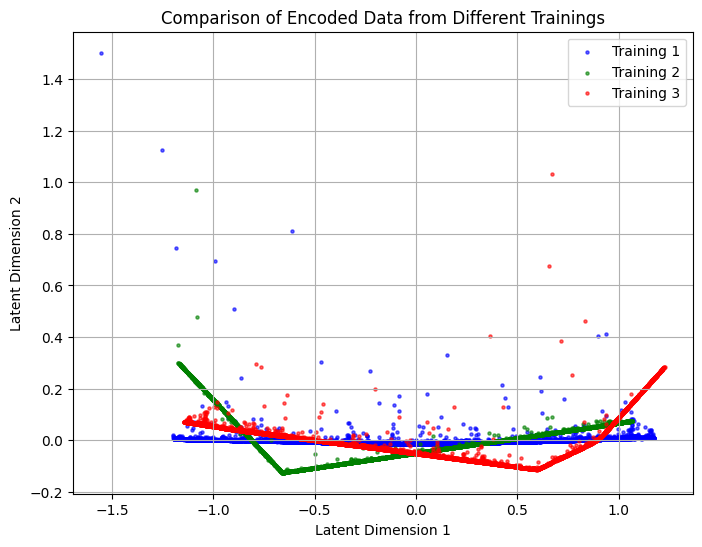

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

colors = ['blue', 'green', 'red']  # Warna yang berbeda untuk setiap training

for i, encoded_data in enumerate(encoded_results):
    # Jika dimensi laten lebih dari 2, kita bisa gunakan PCA
    if encoded_data.shape[1] > 2:
        pca = PCA(n_components=2)
        encoded_2d = pca.fit_transform(encoded_data)
    else:
        encoded_2d = encoded_data

    # Scatter plot untuk setiap hasil encoded
    plt.scatter(encoded_2d[:, 0], encoded_2d[:, 1], c=colors[i], s=5, alpha=0.6, label=f'Training {i+1}')

plt.title('Comparison of Encoded Data from Different Trainings')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.legend()
plt.grid(True)
plt.show()




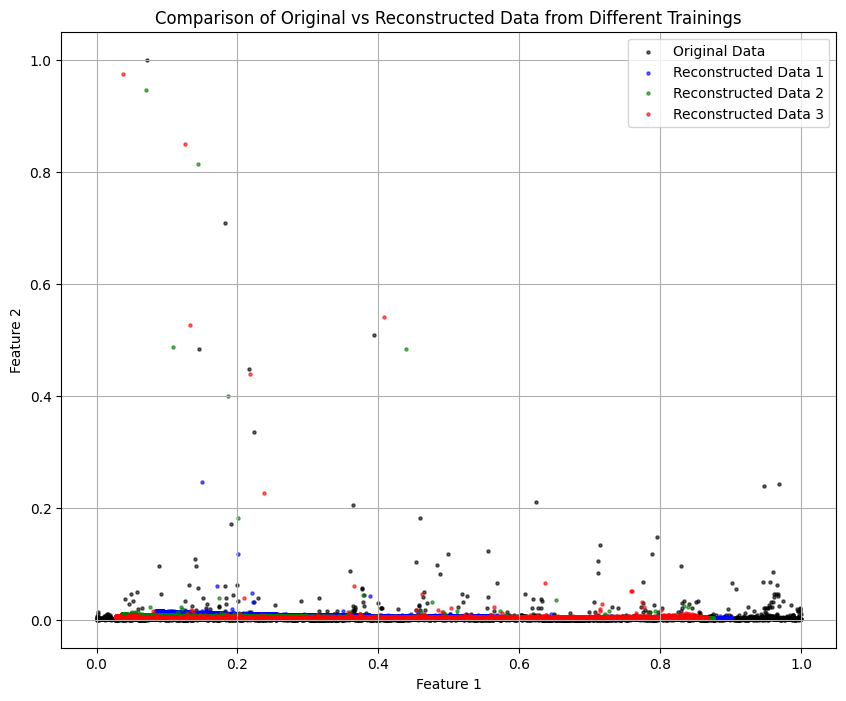

In [10]:
plt.figure(figsize=(10,8))

# Warna yang berbeda untuk setiap rekonstruksi
colors = ['blue', 'green', 'red']

# Scatter plot untuk data asli
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c='black', s=5, alpha=0.6, label='Original Data')

# Scatter plot untuk hasil rekonstruksi dari setiap training
for i, decoded_data in enumerate(decoded_results):
    plt.scatter(decoded_data[:, 0], decoded_data[:, 1], c=colors[i], s=5, alpha=0.6, label=f'Reconstructed Data {i+1}')

plt.title('Comparison of Original vs Reconstructed Data from Different Trainings')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

